In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

from sklearn import model_selection, decomposition, preprocessing, metrics
from sklearn import linear_model, tree, ensemble

/home/aegis/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sdss_df = pd.read_csv("sdss_specgals.csv.gz")
sdss_df

,ra,dec,mjd,plate,fiberID,z,zErr,rChi2,velDisp,velDispErr,...,h_beta_flux_err,h_delta_flux,h_delta_flux_err,d4000,d4000_err,bptclass,lgm_tot_p50,sfr_tot_p50,objID,specObjID
0,146.714191,-1.041276,51630,266,1,0.021222,0.000009,1.500621,131.863570,4.193524,...,6.650275,23.382048,6.433518,1.864510,0.014446,3,10.294713,-0.527342,1237648720142401611,299489677444933632
1,146.744142,-0.652220,51630,266,2,0.203783,0.000039,1.302946,174.164760,13.752029,...,2.697799,1.221214,2.102120,2.157893,0.054713,-1,11.365371,-0.772339,1237650795146510627,299489952322840576
2,146.628573,-0.765147,51630,266,4,0.064656,0.000021,1.227629,123.036330,9.821034,...,2.906838,6.669699,3.581208,1.798716,0.030005,3,10.565862,-1.155230,1237650795146445031,299490502078654464
3,146.631673,-0.988261,51630,266,6,0.052654,0.000009,1.404003,41.803913,24.241034,...,2.279489,11.307991,3.058364,1.388878,0.033203,1,9.363875,-0.411009,1237648720142401670,299491051834468352
4,146.919416,-0.990517,51630,266,7,0.213861,0.000040,1.332148,143.521130,14.563519,...,2.622802,0.239994,2.116303,1.923569,0.047452,-1,11.161670,-0.350026,1237648720142532891,299491326712375296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661593,180.374065,-1.614868,52368,331,442,0.107644,0.000030,1.012648,102.776955,10.408059,...,2.118516,-2.417337,2.151986,1.917258,0.040119,2,10.786465,-0.017128,1237650762927571086,372794404928251904
661594,180.283197,-1.610040,52368,331,443,0.107926,0.000032,0.951197,218.310240,14.749207,...,3.068855,3.535392,2.942980,1.997806,0.030362,5,10.999137,-0.041649,1237650762927571054,372794679806158848
661595,180.251104,-1.389465,52368,331,444,0.035415,0.000010,1.172587,67.323050,8.629884,...,3.190222,15.672132,3.284534,1.561626,0.022240,3,9.948011,-0.841070,1237650372092690555,372794954684065792
661596,180.210816,-1.465440,52368,331,446,0.266921,0.000112,1.017496,137.465940,37.345886,...,2.332922,5.573065,2.395414,2.064437,0.129509,-1,11.796665,-0.430232,1237650762927505634,372795504439879680


In [3]:
sdss_df["bptclass"].unique()

array([ 3, -1,  1,  5,  2,  4])

# Explanation of Dataset Columns

## **Positional & Identification Columns**
- **ra** – Right Ascension (RA) in degrees; celestial longitude.
- **dec** – Declination (DEC) in degrees; celestial latitude.
- **mjd** – Modified Julian Date; time of observation.
- **plate** – Spectroscopic plate ID used in SDSS observations.
- **fiberID** – Fiber ID on the spectrograph plate.
- **objID** – Unique identifier for the object in the SDSS catalog.
- **specObjID** – Unique identifier for the object's spectrum in the SDSS database.

## **Redshift & Velocity**
- **z** – Spectroscopic redshift; measures cosmic expansion.
- **zErr** – Error in redshift measurement.
- **velDisp** – Velocity dispersion; measures the spread in velocities of stars in a galaxy.
- **velDispErr** – Error in velocity dispersion.

## **Photometry & Magnitudes**
- **extinction_r** – Galactic extinction in the r-band (correction for dust absorption).
- **petroMag_r** – Petrosian magnitude in the r-band (total flux measurement).
- **psfMag_r** – PSF (Point Spread Function) magnitude in the r-band; best for point sources.
- **psfMagErr_r** – Error in PSF magnitude in the r-band.
- **modelMag_u** – Model magnitude in the u-band.
- **modelMagErr_u** – Error in model magnitude in the u-band.
- **modelMag_g** – Model magnitude in the g-band.
- **modelMagErr_g** – Error in model magnitude in the g-band.
- **modelMag_r** – Model magnitude in the r-band.
- **modelMagErr_r** – Error in model magnitude in the r-band.
- **modelMag_i** – Model magnitude in the i-band.
- **modelMagErr_i** – Error in model magnitude in the i-band.
- **modelMag_z** – Model magnitude in the z-band.
- **modelMagErr_z** – Error in model magnitude in the z-band.

## **Galaxy Size & Structure**
- **petroR50_r** – Petrosian radius containing 50% of the total r-band flux.
- **petroR90_r** – Petrosian radius containing 90% of the total r-band flux.

## **Emission Line Fluxes & Errors (Key for BPT Classification)**
- **nii_6584_flux** – Flux of the [NII] λ6584 emission line.
- **nii_6584_flux_err** – Error in [NII] λ6584 flux.
- **h_alpha_flux** – Flux of the H-alpha (Hα) emission line.
- **h_alpha_flux_err** – Error in H-alpha flux.
- **oiii_5007_flux** – Flux of the [OIII] λ5007 emission line.
- **oiii_5007_flux_err** – Error in [OIII] λ5007 flux.
- **h_beta_flux** – Flux of the H-beta (Hβ) emission line.
- **h_beta_flux_err** – Error in H-beta flux.
- **h_delta_flux** – Flux of the H-delta (Hδ) emission line.
- **h_delta_flux_err** – Error in H-delta flux.

## **Galaxy Properties**
- **d4000** – Strength of the 4000Å break, indicating stellar age.
- **d4000_err** – Error in D4000 measurement.
- **lgm_tot_p50** – Logarithm of the total stellar mass (median estimate).
- **sfr_tot_p50** – Logarithm of the total star formation rate (median estimate).

## **Classification Target**
- **bptclass** – BPT classification label (AGN, Star-forming, Composite, LINER, etc.).
  
	- **-1**: Unclassified or ambiguous sources.
        - These objects do not fit into any of the BPT classification categories.

        - They may have weak or missing emission lines, making their classification uncertain.

        - Can include objects with low signal-to-noise ratios in key spectral lines.
  
	- **1**: Star-forming galaxies (SF) - Ionization dominated by young, hot stars.
        - Dominated by ionization from young, hot, massive stars.

        - Strong H-alpha and H-beta emission lines, indicating active star formation.

        - Low ratios of [NII]6584/H-alpha and [OIII]5007/H-beta.

        - Typically have high specific star formation rates (sSFR).

	- **2**: Composite galaxies - A mix of both star-forming and AGN activity.
        - Show emission line properties that are intermediate between star-forming galaxies and AGN.

        - A mix of ionization from both young stars and an active galactic nucleus (AGN).

        - Moderate values of [NII]6584/H-alpha and [OIII]5007/H-beta ratios.

        - Can be evolving into AGN-dominated systems.
  
	- **3**: Seyfert galaxies - A subclass of AGN with strong, high-ionization emission lines.
        - A subclass of AGN with strong, high-ionization emission lines.

        - High ratios of [OIII]5007/H-beta, indicating the presence of an energetic AGN.

        - Bright central nucleus often detected in optical and X-ray observations.

        - Strong variability over time in brightness and emission line intensity.
  
	- **4**: Low-Ionization Nuclear Emission-line Region (LINER) - A subclass of AGN with lower ionization energy.
        - A subclass of AGN with lower ionization energy than Seyferts.

        - Lower [OIII]5007/H-beta ratios compared to Seyfert galaxies.

        - Ionized by a weak AGN, old stellar populations, or shocks.

        - Often found in massive, early-type galaxies.
  
	- **5**: AGN (Active Galactic Nucleus) - Includes Seyferts and LINERs but may also represent general AGN activity.
        - Ionization is dominated by accretion onto a supermassive black hole.

        - Can exhibit broad or narrow emission lines depending on viewing angle (Type 1 vs. Type 2 AGN).

        - Associated with strong radio, X-ray, and infrared emission.



In [4]:
# Remove useless features
sdss_df = sdss_df.drop(columns = ["ra", "dec", "mjd", "plate", "fiberID", "objID", "specObjID"])

In [5]:
# Add new feature
# sdss_df["r5007/Hbeta"] = sdss_df["oiii_5007_flux"]/sdss_df["h_beta_flux"]
sdss_df["NII/H-alpha"] = sdss_df["nii_6584_flux"]/sdss_df["h_alpha_flux"]
sdss_df["OIII/H-beta"] = sdss_df["oiii_5007_flux"]/sdss_df["h_beta_flux"]
sdss_df['d4000_oiii'] = sdss_df['d4000'] * sdss_df['oiii_5007_flux']
sdss_df['d4000_nii'] = sdss_df['d4000'] * sdss_df['nii_6584_flux']
sdss_df['d4000_halpha'] = sdss_df['d4000'] * sdss_df['h_alpha_flux']
sdss_df['d4000_hbeta'] = sdss_df['d4000'] * sdss_df['h_beta_flux']
sdss_df['d4000_hdelta'] = sdss_df['d4000'] * sdss_df['h_delta_flux']

In [6]:
sdss_df

,z,zErr,rChi2,velDisp,velDispErr,extinction_r,petroMag_r,psfMag_r,psfMagErr_r,modelMag_u,...,bptclass,lgm_tot_p50,sfr_tot_p50,NII/H-alpha,OIII/H-beta,d4000_oiii,d4000_nii,d4000_halpha,d4000_hbeta,d4000_hdelta
0,0.021222,0.000009,1.500621,131.863570,4.193524,0.151925,14.841243,16.591177,0.014653,17.150417,...,3,10.294713,-0.527342,0.474224,0.572373,127.525104,417.861862,881.149290,222.800756,43.596051
1,0.203783,0.000039,1.302946,174.164760,13.752029,0.230671,17.788576,18.932100,0.013029,21.334766,...,-1,11.365371,-0.772339,-0.711259,0.783496,11.162545,-5.244824,7.373997,14.247096,2.635249
2,0.064656,0.000021,1.227629,123.036330,9.821034,0.204896,16.831940,18.155624,0.012544,19.509130,...,3,10.565862,-1.155230,0.519029,0.836348,38.572326,92.798557,178.792479,46.119921,11.996895
3,0.052654,0.000009,1.404003,41.803913,24.241034,0.143905,17.841830,19.585197,0.019922,19.489283,...,1,9.363875,-0.411009,0.202580,0.925244,49.258930,35.818656,176.812182,53.238831,15.705421
4,0.213861,0.000040,1.332148,143.521130,14.563519,0.164591,17.660454,19.161509,0.017976,20.432014,...,-1,11.161670,-0.350026,1.015269,1.220314,16.473521,26.019506,25.628181,13.499411,0.461644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661593,0.107644,0.000030,1.012648,102.776955,10.408059,0.070095,17.237972,18.518274,0.024112,19.472832,...,2,10.786465,-0.017128,0.489859,1.057771,11.357209,21.024410,42.919273,10.736922,-4.634657
661594,0.107926,0.000032,0.951197,218.310240,14.749207,0.079567,16.744400,17.977108,0.023433,19.356380,...,5,10.999137,-0.041649,0.653751,1.146554,24.398893,52.212663,79.866308,21.280198,7.063028
661595,0.035415,0.000010,1.172587,67.323050,8.629884,0.092224,16.651764,18.025562,0.014965,18.842731,...,3,9.948011,-0.841070,0.595641,0.416443,44.829048,333.768734,560.352408,107.647536,24.474006
661596,0.266921,0.000112,1.017496,137.465940,37.345886,0.088893,17.856642,20.130053,0.060893,22.760687,...,-1,11.796665,-0.430232,-0.333932,0.392676,2.919706,-2.221157,6.651528,7.435412,11.505242


In [15]:
sdss_df = sdss_df.dropna(subset=['bptclass'])

Train = False
# relevant_features = [
#     'nii_6584_flux', 'h_alpha_flux', 'oiii_5007_flux', 'h_beta_flux',
#     'sfr_tot_p50', 'lgm_tot_p50', 'd4000', 'velDisp'
# ]
# X = sdss_df[relevant_features]
X = sdss_df.drop(columns=['bptclass'])  # Use all features
y = sdss_df['bptclass']

X = X.fillna(X.median())
X = X.replace([np.inf, -np.inf], np.nan)  # Temporarily replace inf with NaN
X = X.fillna(X.max())  # Replace NaN with the max finite value

print(sum(np.isinf(X.values)))

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.2, random_state=42)

if Train:
    print("=== Training ===")
    log_reg = linear_model.LogisticRegression(max_iter=500)
    decision_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=42)
    random_forest = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
    
    log_reg.fit(X_train, y_train)
    decision_tree.fit(X_train, y_train)
    random_forest.fit(X_train, y_train)
    
    joblib.dump(log_reg, 'logistic_regression_model.pkl')
    joblib.dump(decision_tree, 'decision_tree_model.pkl')
    joblib.dump(random_forest, 'random_forest_model.pkl')
else:
    print("=== Loading ===")
    log_reg = joblib.load('logistic_regression_model.pkl')
    decision_tree = joblib.load('decision_tree_model.pkl')
    random_forest = joblib.load('random_forest_model.pkl')
    scaler = joblib.load('scaler.pkl')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
=== Training ===
Logistic Regression Metrics:
  Accuracy: 0.7180
  Precision: 0.6823
  Recall: 0.7180
  F1 Score: 0.6843
  AUC: 0.9116

Decision Tree Metrics:
  Accuracy: 0.9515
  Precision: 0.9518
  Recall: 0.9515
  F1 Score: 0.9516
  AUC: 0.9939

Random Forest Metrics:
  Accuracy: 0.9684
  Precision: 0.9684
  Recall: 0.9684
  F1 Score: 0.9683
  AUC: 0.9990



NameError: name 'relevant_features' is not defined

Logistic Regression Metrics:
  Accuracy: 0.7180
  Precision: 0.6823
  Recall: 0.7180
  F1 Score: 0.6843
  AUC: 0.9116

Decision Tree Metrics:
  Accuracy: 0.9515
  Precision: 0.9518
  Recall: 0.9515
  F1 Score: 0.9516
  AUC: 0.9939

Random Forest Metrics:
  Accuracy: 0.9684
  Precision: 0.9684
  Recall: 0.9684
  F1 Score: 0.9683
  AUC: 0.9990



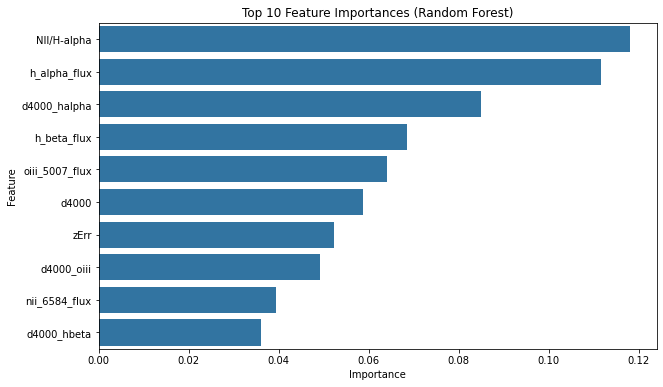

In [17]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, "predict_proba") else None
    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    if auc is not None:
        print(f"  AUC: {auc:.4f}\n")

evaluate_model(log_reg, "Logistic Regression")
evaluate_model(decision_tree, "Decision Tree")
evaluate_model(random_forest, "Random Forest")

importances = random_forest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df.Importance[:10], y=feature_importance_df.Feature[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [18]:
log_reg_pred = log_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

pred_actual_df = pd.DataFrame([log_reg_pred, decision_tree_pred, random_forest_pred, y_test]).T
pred_actual_df.columns = ["LogReg Pred", "Decision Tree Pred", "Random Forest Pred", "Actual"]
pred_actual_df

,LogReg Pred,Decision Tree Pred,Random Forest Pred,Actual
0,-1,5,5,5
1,1,1,1,1
2,2,2,2,2
3,2,3,3,3
4,1,1,1,1
...,...,...,...,...
132315,1,1,1,1
132316,-1,-1,-1,-1
132317,2,2,1,1
132318,-1,-1,-1,-1


### Confusion Matrix

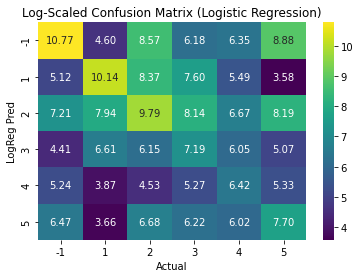

In [22]:
conf_matrix = pd.crosstab(pred_actual_df["LogReg Pred"], pred_actual_df["Actual"])

# Apply log transformation, add 1 to avoid log(0)
log_conf_matrix = np.log1p(conf_matrix)

# Plot heatmap with log-scaled counts
sns.heatmap(log_conf_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Log-Scaled Confusion Matrix (Logistic Regression)")
plt.show()


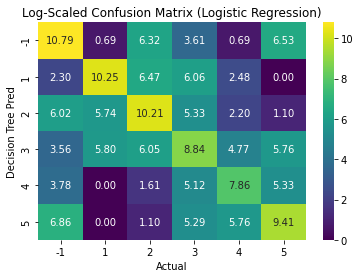

In [24]:
conf_matrix = pd.crosstab(pred_actual_df["Decision Tree Pred"], pred_actual_df["Actual"])

# Apply log transformation, add 1 to avoid log(0)
log_conf_matrix = np.log1p(conf_matrix)

# Plot heatmap with log-scaled counts
sns.heatmap(log_conf_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Log-Scaled Confusion Matrix (Logistic Regression)")
plt.show()

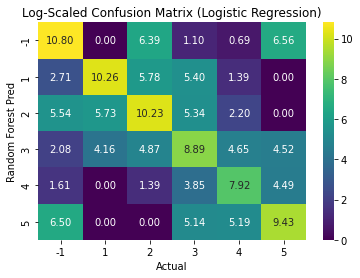

In [26]:
conf_matrix = pd.crosstab(pred_actual_df["Random Forest Pred"], pred_actual_df["Actual"])

# Apply log transformation, add 1 to avoid log(0)
log_conf_matrix = np.log1p(conf_matrix)

# Plot heatmap with log-scaled counts
sns.heatmap(log_conf_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Log-Scaled Confusion Matrix (Logistic Regression)")
plt.show()
